#**Temperature monitoring system using LM35 (Temperature sensor)**
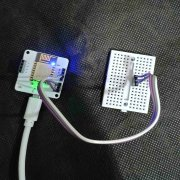 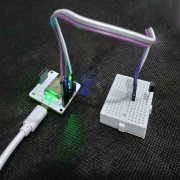

##**Things used in this project**
**Hardware components**
 * Bolt IoT Bolt WiFi Module
 * LM35 sensor
 * Jumper wires

**Software components**
 * Twilio
 * Python

##**Story**
Today, most of the products that we produce have a very crucial factor affecting them, temperature. Starting from the traditional crops to the artificial ones in food industries, from drugs to chemicals manufactured in the pharmaceutical industries, all of them need the right amount of temperature to be maintained for manufacture which is why the monitoring of temperature constantly is an indispensable part of these sectors.

Our homes too have a thermostat installed which monitor and regulate the temperature. Maintaining the right temperature is required for having a healthy growth of plants in a greenhouse. If the right temperature is not maintained, the plants will die.

##**Gathering all required components**
* Bolt WiFi Module
* LM35 IC (Temperature sensor)
* Breadboard
* Wires

##**Installing BoltIoT library**

In [1]:
!pip install boltiot

##**Importing required libraries**

In [2]:
import json, time
from boltiot import Sms, Bolt

##**Adding credentials of Bolt Module and Twilio Account**

In [3]:
api_key = "XXXXXXXX-XXXX-XXXX-XXXX-XXXXXXXXXXXX"
device_id = "BOLTXXXXXXX"
mybolt = Bolt(api_key,device_id)
SID = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
auth_token = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
to_number = "+91XXXXXXXXXX"
from_number = "+16XXXXXXXX"
sms = Sms(SID,auth_token,to_number,from_number)

In [4]:
split = mybolt.isOnline().split('"')
print(split)

['{', 'value', ': ', 'online', ', ', 'time', ': ', 'Sun 2024-08-18 18:26:01 UTC', ', ', 'success', ': 1}']


##**Temperature Monitoring Code**

In [10]:
if( split[3]=="offline" ):
    print("Bolt is offline. Please check connections")
    exit()
else:
  # Deciding Minimum Temperature as required for application
  user_min = float(input("Enter the minimum temperature in degree celsius: "))

  # Deciding Maximum Temperature as required for application
  user_max = float(input("Enter the maximum temperature in degree celsius: "))

  # Temperature in degree celsius = reading from sensor / 10.24
  # Reading from sensor = Temperature in degree celsius * 10.24

  min_limit = (user_min * 1024) / 100
  max_limit = (user_max * 1024) / 100
  sensor_data = [ ]
  for i in range(10):
    print ("Reading the sensor value")
    response = mybolt.analogRead('A0')
    data = json.loads(response)
    current_time = time.asctime().split(' ')[3]
    if ( data['value'] == 'Device is offline' ):
      print("Device is offline")
      break
    elif ( data['value'] == 'Command timed out' ):
      print("Command timed out")
      break
    else:
      print("Sensor value is: " +data['value'])
      sensor_data.append( [current_time , data['value']] )
      try:
          sensor_value = int(data['value'])
          if ( (sensor_value > max_limit ) or (sensor_value < min_limit) ):
              print("Making request to Twilio to send a SMS")
              response = sms.send_sms("The Current temperature sensor value is " +str(sensor_value))
              print("Response received from Twilio is: " + str(response))
              print("Status of SMS at Twilio is :" + str(response.status))
      except Exception as e:
          print ("Error occured: Below are the details")
          print (e)
      time.sleep(10)

Enter the minimum temperature in degree celsius: 30
Enter the maximum temperature in degree celsius: 45
Reading the sensor value
Sensor value is: 315
Reading the sensor value
Sensor value is: 338
Reading the sensor value
Sensor value is: 354
Reading the sensor value
Sensor value is: 327
Reading the sensor value
Sensor value is: 449
Reading the sensor value
Sensor value is: 413
Reading the sensor value
Sensor value is: 470
Making request to Twilio to send a SMS
Response received from Twilio is: <Twilio.Api.V2010.MessageInstance account_sid=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX sid=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX>
Status of SMS at Twilio is :queued
Reading the sensor value
Sensor value is: 441
Reading the sensor value
Sensor value is: 340
Reading the sensor value
Sensor value is: 297
Making request to Twilio to send a SMS
Response received from Twilio is: <Twilio.Api.V2010.MessageInstance account_sid=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX sid=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX>
Status of SMS

##**Readings from sensor**

In [11]:
print(sensor_data)

[['18:30:46', '315'], ['18:31:00', '338'], ['18:31:15', '354'], ['18:31:26', '327'], ['18:31:41', '449'], ['18:31:57', '413'], ['18:32:10', '470'], ['18:32:21', '441'], ['18:32:36', '340'], ['18:32:50', '297']]


##**Table of temperature**

In [21]:
import pandas as pd
df = pd.DataFrame(sensor_data,columns=['Time','Temperature from sensor'])
df

,Time,Temperature from sensor
0,18:30:46,315
1,18:31:00,338
2,18:31:15,354
3,18:31:26,327
4,18:31:41,449
5,18:31:57,413
6,18:32:10,470
7,18:32:21,441
8,18:32:36,340
9,18:32:50,297


##**Sensor Readings converted into degree celsius**

In [24]:
temperature_array = pd.Series(df['Temperature from sensor']).astype(int)
for i in range(10):
  temperature_array[i] = (temperature_array[i] * 100) / 1024
print(temperature_array)

0    30.761719
1    33.007812
2    34.570312
3    31.933594
4    43.847656
5    40.332031
6    45.898438
7    43.066406
8    33.203125
9    29.003906
Name: Temperature from sensor, dtype: float64


<ipython-input-24-1f2830201dff>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30.76171875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  temperature_array[i] = (temperature_array[i] * 100) / 1024


##**Plotting the graph**

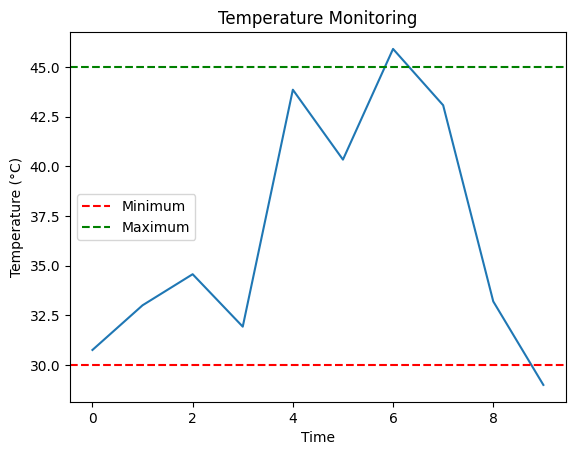

In [25]:
import matplotlib.pyplot as plt

plt.plot(temperature_array)
plt.axhline(y = user_min, color = 'r', linestyle = '--', label = 'Minimum')
plt.axhline(y = user_max, color = 'g', linestyle = '--', label = 'Maximum')

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Monitoring')
plt.legend()

plt.show()

##**Alert on phone through SMS for temperature(sensor value) greater and less than maximum and minimum temperature(sensor value)**

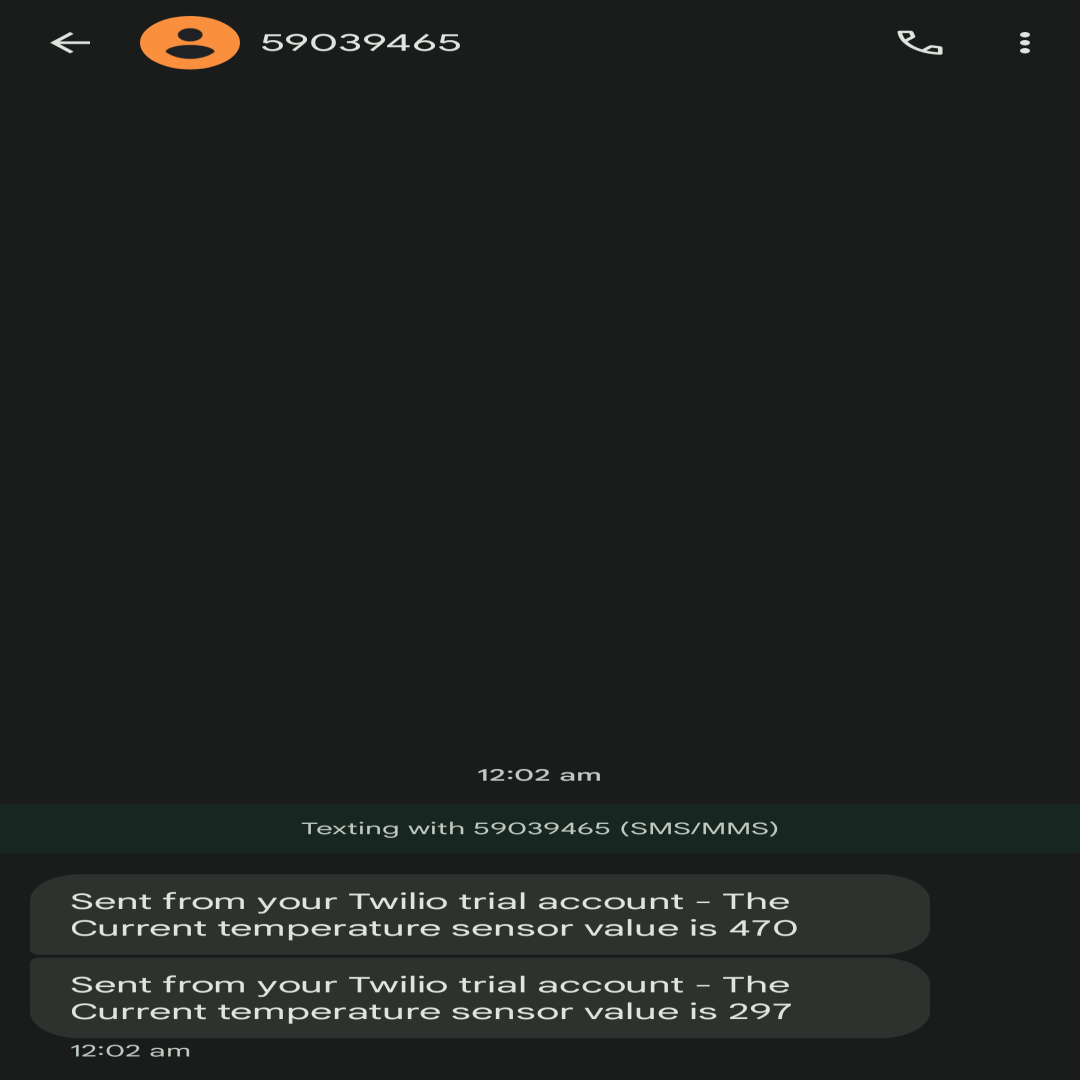